In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Norm_data.csv')
df = df.drop(columns="Unnamed: 0")
df.head()

,DTP,Ala,Cys,Asp,Glu,Phe,Gly,His,Ile,Lys,...,TransHel_10,TransHel_11,TransHel_12,TransHel_13,TransHel_14,TransHel_15,TransHel_16,TransHel_17,TransHel_19,TransHel_31
0,0,0.201217,0.049898,0.135014,0.192164,0.606348,0.082153,0.072733,0.316374,0.157088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.377079,0.074389,0.150936,0.184124,0.210396,0.157443,0.081300,0.219536,0.214624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.179019,0.061000,0.206254,0.301967,0.258755,0.118346,0.183333,0.269995,0.192000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.217427,0.077897,0.210709,0.281810,0.316313,0.109911,0.072033,0.306474,0.182304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.547961,0.061610,0.166653,0.203337,0.212984,0.195615,0.078567,0.121198,0.129280,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.columns

Index(['DTP', 'Ala', 'Cys', 'Asp', 'Glu', 'Phe', 'Gly', 'His', 'Ile', 'Lys',
       ...
       'TransHel_10', 'TransHel_11', 'TransHel_12', 'TransHel_13',
       'TransHel_14', 'TransHel_15', 'TransHel_16', 'TransHel_17',
       'TransHel_19', 'TransHel_31'],
      dtype='object', length=218)

In [4]:
df.shape

(5893, 218)

In [5]:
X = df.iloc[:, 1:]
y = df['DTP']

In [80]:
# store X and y before manipulating later
X_n = X
y_n = y 


In [6]:
X.head()

,Ala,Cys,Asp,Glu,Phe,Gly,His,Ile,Lys,Leu,...,TransHel_10,TransHel_11,TransHel_12,TransHel_13,TransHel_14,TransHel_15,TransHel_16,TransHel_17,TransHel_19,TransHel_31
0,0.201217,0.049898,0.135014,0.192164,0.606348,0.082153,0.072733,0.316374,0.157088,0.291141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.377079,0.074389,0.150936,0.184124,0.210396,0.157443,0.081300,0.219536,0.214624,0.240084,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.179019,0.061000,0.206254,0.301967,0.258755,0.118346,0.183333,0.269995,0.192000,0.223126,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.217427,0.077897,0.210709,0.281810,0.316313,0.109911,0.072033,0.306474,0.182304,0.242394,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.547961,0.061610,0.166653,0.203337,0.212984,0.195615,0.078567,0.121198,0.129280,0.327025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X.shape

(5893, 217)

In [7]:
y.shape

(5893,)

In [8]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Create a numpy array from the pandas dataframe
X = X.values

# Apply PCA transformation
pca = PCA(n_components=217)
X_transformed = pca.fit_transform(X)

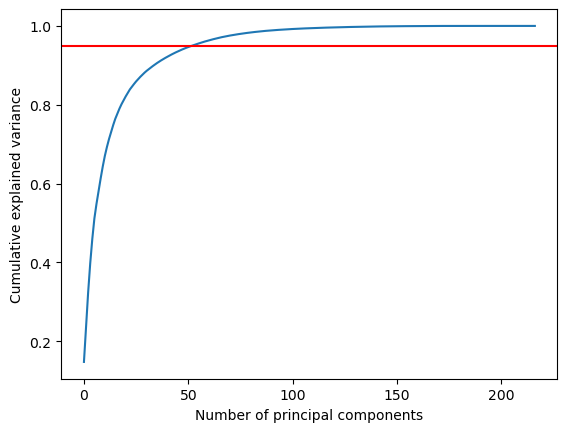

In [9]:
import matplotlib.pyplot as plt

# Determine explained variance for each principal component
explained_variance = pca.explained_variance_ratio_

# Determine cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Create a line plot to visualize the cumulative explained variance
plt.plot(range(217), cumulative_explained_variance)
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')

# Draw a horizontal line at y=0.95
plt.axhline(y=0.95, color='r', linestyle='-')

plt.show()

In [12]:
X.shape

(5893, 217)

In [76]:
X.head()

,Ala,Cys,Asp,Glu,Phe,Gly,His,Ile,Lys,Leu,...,TransHel_10,TransHel_11,TransHel_12,TransHel_13,TransHel_14,TransHel_15,TransHel_16,TransHel_17,TransHel_19,TransHel_31
0,0.201217,0.049898,0.135014,0.192164,0.606348,0.082153,0.072733,0.316374,0.157088,0.291141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.377079,0.074389,0.150936,0.184124,0.210396,0.157443,0.081300,0.219536,0.214624,0.240084,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.179019,0.061000,0.206254,0.301967,0.258755,0.118346,0.183333,0.269995,0.192000,0.223126,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.217427,0.077897,0.210709,0.281810,0.316313,0.109911,0.072033,0.306474,0.182304,0.242394,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.547961,0.061610,0.166653,0.203337,0.212984,0.195615,0.078567,0.121198,0.129280,0.327025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Create the random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the classifier to the data
clf.fit(X, y)

# Get the feature importances
importances = clf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create a list to store the feature importances
important_features = []

# Initialize a variable to store the cumulative feature importance
cumulative_importance = 0

# Loop over the feature importances
for i in indices:
    # Get the current feature importance
    importance = importances[i]
    # Add the current feature importance to the cumulative feature importance
    cumulative_importance += importance
    # Append the current feature to the list of important features
    important_features.append(X.columns[i])
    # If the cumulative feature importance is greater than or equal to 0.95, break the loop
    if cumulative_importance >= 0.95:
        break

# Print the list of important features
print("Important features:", important_features)
print(len(important_features))

Important features: ['Gly', 'Ser', 'Tyr', 'Leu', 'Pro', 'Gln', 'Hydrophobicity', 'Polar', 'Ile', 'Non-polar', 'Phe', 'Acidic', 'Lys', 'Asp', 'Val', 'Aromatic', 'Aliphatic', 'Arg', 'Small', 'Basic', 'Met', 'Thr', 'Tiny', 'Asn', 'Ala', 'Cys', 'Charged', 'Trp', 'Glu', 'His', 'SignalP', 'LowComplexityRegions', 'Trans_Helices', 'Ngly', 'Ogly_T', 'Thr_1', 'Tyr_1', 'NGLY_0', 'NGLY_2', 'Ser_1', 'Ogly_S', 'LCR_0', 'THR1_0', 'NGLY_1', 'TransHel_0', 'LCR_1', 'THR1_1', 'LCR_2', 'SR1_2', 'TransHel_1', 'SR1_0']
51


In [14]:
# Create a new data frame with only the important features
df_important = pd.DataFrame(X, columns=important_features)

df_important.head()

,Gly,Ser,Tyr,Leu,Pro,Gln,Hydrophobicity,Polar,Ile,Non-polar,...,LCR_0,THR1_0,NGLY_1,TransHel_0,LCR_1,THR1_1,LCR_2,SR1_2,TransHel_1,SR1_0
0,0.082153,0.241186,0.164048,0.291141,0.118990,0.020253,0.976817,0.304237,0.316374,0.695763,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.157443,0.276723,0.094857,0.240084,0.046040,0.037053,0.968404,0.396147,0.219536,0.603853,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.118346,0.226908,0.093333,0.223126,0.088104,0.040506,0.963205,0.472872,0.269995,0.527128,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.109911,0.315472,0.085555,0.242394,0.108795,0.029843,0.960029,0.439435,0.306474,0.560565,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.195615,0.176325,0.031422,0.327025,0.152570,0.034096,0.976340,0.254036,0.121198,0.745964,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [15]:
df_important.shape

(5893, 51)

In [16]:
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(df_important, y, test_size=0.3, random_state=42)

# Convert the training set and test set to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train.values).float()
X_test_tensor = torch.from_numpy(X_test.values).float()

# Convert the training set and test set to PyTorch datasets
train_dataset = TensorDataset(X_train_tensor)
test_dataset = TensorDataset(X_test_tensor)

# Create data loaders for the training set and test set
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [17]:
def train_stacked_autoencoder(model, train_dataloader, test_dataloader, num_epochs):
    optimizer = torch.optim.Adam(model.parameters())
    loss_fn = nn.MSELoss()

    for epoch in range(num_epochs):
        for i, (x,) in enumerate(train_dataloader):
            # Pass the input through the model
            reconstruction = model(x)

            # Calculate the reconstruction loss
            reconstruction_loss = loss_fn(reconstruction, x)

            # Zero the gradients
            optimizer.zero_grad()

            # Perform backpropagation and optimization
            reconstruction_loss.backward()
            optimizer.step()

        # Evaluate the model on the test data
        test_loss = 0
        with torch.no_grad():
            for i, (x_test,) in enumerate(test_dataloader):
                # Pass the test input through the model
                test_reconstruction = model(x_test)

                # calculate the test reconstruction loss
                test_loss += loss_fn(test_reconstruction, x_test).item()
        test_loss /= len(test_dataloader)
        print("Epoch {}: Train Loss: {:.4f} Test Loss: {:.4f}".format(epoch+1, reconstruction_loss.item(), test_loss))

In [77]:
class StackedAutoEncoder3(nn.Module):
    def __init__(self):
        super(StackedAutoEncoder3, self).__init__()

        # Encoder layers
        self.encoder_layers = nn.Sequential(
            nn.Linear(51, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 36),
            nn.ReLU(),
            nn.Linear(36, 18),
            nn.ReLU(),
            nn.Linear(18, 9)
        )
        
        # Decoder layers
        self.decoder_layers = nn.Sequential(
            nn.Linear(9, 18),
            nn.ReLU(),
            nn.Linear(18, 36),
            nn.ReLU(),
            nn.Linear(36, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 51),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder_layers(x)
        x = self.decoder_layers(x)
        return x

In [78]:
model3 = StackedAutoEncoder3()
train_stacked_autoencoder(model3, train_dataloader=train_dataloader, test_dataloader=test_dataloader, num_epochs=50 )

Epoch 1: Train Loss: 0.0457 Test Loss: 0.0437
Epoch 2: Train Loss: 0.0389 Test Loss: 0.0378
Epoch 3: Train Loss: 0.0271 Test Loss: 0.0303
Epoch 4: Train Loss: 0.0254 Test Loss: 0.0239
Epoch 5: Train Loss: 0.0184 Test Loss: 0.0215
Epoch 6: Train Loss: 0.0216 Test Loss: 0.0203
Epoch 7: Train Loss: 0.0150 Test Loss: 0.0188
Epoch 8: Train Loss: 0.0184 Test Loss: 0.0177
Epoch 9: Train Loss: 0.0204 Test Loss: 0.0163
Epoch 10: Train Loss: 0.0126 Test Loss: 0.0152
Epoch 11: Train Loss: 0.0121 Test Loss: 0.0142
Epoch 12: Train Loss: 0.0121 Test Loss: 0.0137
Epoch 13: Train Loss: 0.0122 Test Loss: 0.0131
Epoch 14: Train Loss: 0.0091 Test Loss: 0.0132
Epoch 15: Train Loss: 0.0107 Test Loss: 0.0124
Epoch 16: Train Loss: 0.0124 Test Loss: 0.0126
Epoch 17: Train Loss: 0.0114 Test Loss: 0.0118
Epoch 18: Train Loss: 0.0080 Test Loss: 0.0116
Epoch 19: Train Loss: 0.0127 Test Loss: 0.0114
Epoch 20: Train Loss: 0.0128 Test Loss: 0.0112
Epoch 21: Train Loss: 0.0093 Test Loss: 0.0109
Epoch 22: Train Loss: 

In [24]:
print(type(train_dataloader))


<class 'torch.utils.data.dataloader.DataLoader'>


In [26]:
print(enumerate(train_dataloader))

In [25]:
print(type(test_dataloader))

<class 'torch.utils.data.dataloader.DataLoader'>


In [30]:
compressed_train_data = []
for i, x in enumerate(train_dataloader):
    x = x[0] # extract the tensor from the list
    x = x.view(x.size(0), -1)
    compressed_train = model3.encoder_layers(x)
    compressed_train_data.append(compressed_train)


In [32]:
compressed_test_data = []
for i, x in enumerate(test_dataloader):
    x = x[0] # extract the tensor from the list
    x = x.view(x.size(0), -1)
    compressed_test = model3.encoder_layers(x)
    compressed_test_data.append(compressed_test)

In [31]:
print(compressed_train_data)

[tensor([[  6.5755,   5.5717,   3.6578,   4.2717,   5.3466,   3.6425,  -3.6222,
          -3.7026,  -2.5766],
        [  6.3380,   6.7681,   8.6376,   2.0949,   2.4510,   1.6255,  -2.9590,
          -0.6639,  -1.3883],
        [  8.8574,   7.3943,   4.2053,   5.5322,   5.2824,   3.9500,  -1.4616,
          -3.9430,  -5.2204],
        [ 13.1534,  10.8030,   6.9760,   8.3951,   8.8254,   6.9879,  -4.5945,
          -6.9585,  -6.0425],
        [  6.1748,   4.0710,   9.5841,   0.4484,  -0.1537,   2.5858,  -1.5167,
           1.2395,  -0.6662],
        [  4.9897,   5.7602,   9.2775,   0.4876,   0.5672,   0.3407,  -1.9889,
           1.1890,  -0.6101],
        [ 14.0182,   9.7867,   5.2918,   9.4436,  13.9183,  12.0345, -10.6842,
         -11.5297,  -3.2259],
        [  6.4982,   7.1029,  11.9665,   1.6025,   5.2102,   4.2099,  -9.6142,
          -1.8456,   3.0783],
        [  6.1577,   4.1352,  12.1118,   0.9039,   5.5179,   7.5786, -12.2655,
          -2.0241,   5.7229],
        [  8.4560,

In [33]:
print(compressed_test_data)

[tensor([[ 1.2631e+01,  1.0408e+01,  8.1658e+00,  7.6027e+00,  9.8949e+00,
          8.3500e+00, -7.7726e+00, -7.7963e+00, -3.3196e+00],
        [ 8.7558e+00,  7.2519e+00,  1.0479e+01,  3.9247e+00,  9.5411e+00,
          9.2668e+00, -1.3434e+01, -6.3711e+00,  3.8009e+00],
        [ 4.4993e+00,  5.0962e+00,  6.8405e+00,  1.4765e+00,  2.3104e+00,
          1.2448e+00, -3.3170e+00, -4.9208e-01, -3.4816e-01],
        [ 6.4728e+00,  6.1097e+00,  7.7807e+00,  3.0472e+00,  6.1863e+00,
          5.2107e+00, -8.2562e+00, -3.6667e+00,  1.3605e+00],
        [ 3.7869e+00,  1.8045e+00,  8.2702e+00, -8.9120e-01, -1.8133e+00,
          1.7498e+00, -9.4081e-01,  2.7153e+00,  1.5892e-01],
        [ 5.8809e+00,  6.6119e+00,  9.7978e+00,  9.8012e-01,  8.0782e-01,
          4.6657e-01, -1.7016e+00,  1.0210e+00, -1.3411e+00],
        [ 6.3308e+00,  4.6235e+00,  1.2990e+01,  7.8123e-01,  4.7298e+00,
          6.8498e+00, -1.1435e+01, -1.3154e+00,  5.3038e+00],
        [ 6.6744e+00,  6.1584e+00,  7.9735e+00,

In [34]:
import xgboost as xgb
from xgboost import XGBClassifier

/Users/nick/opt/anaconda3/envs/Torch_SB2/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [40]:

compressed_train_data_np = [c.detach().numpy() for c in compressed_train_data]
compressed_train_data_np = np.concatenate(compressed_train_data_np)


In [42]:
compressed_test_data_np = [c.detach().numpy() for c in compressed_test_data]
compressed_test_data_np = np.concatenate(compressed_test_data_np)

In [43]:
xgb_model = XGBClassifier()
xgb_model.fit(compressed_train_data_np, y_train)

[17:59:25] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
predictions = xgb_model.predict(compressed_test_data_np)


In [47]:
print(len(predictions))

1768


In [48]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)


array([[   0,  180],
       [  11, 1577]])

/Users/nick/opt/anaconda3/envs/Torch_SB2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


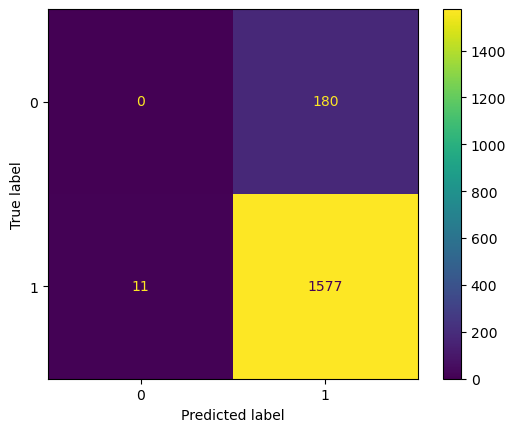

In [50]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(xgb_model, compressed_test_data_np, y_test)


In [53]:
# recombine the data
compressed_data = np.concatenate((compressed_train_data_np, compressed_test_data_np), axis=0)
labels = np.hstack((y_train, y_test))
combined_data = list(zip(compressed_data, labels))


In [54]:
df2 = pd.DataFrame(combined_data)
df2.head()

,0,1
0,"[6.5755234, 5.571748, 3.6578317, 4.271656, 5.3...",1
1,"[6.3379602, 6.768138, 8.637618, 2.094925, 2.45...",1
2,"[8.857427, 7.394251, 4.2053165, 5.5321593, 5.2...",1
3,"[13.153353, 10.80303, 6.975997, 8.395071, 8.82...",1
4,"[6.174841, 4.07103, 9.584067, 0.44837558, -0.1...",1


In [58]:
df2.columns = ['compressed_data', 'labels']

In [59]:
df2.head()

,compressed_data,labels
0,"[6.5755234, 5.571748, 3.6578317, 4.271656, 5.3...",1
1,"[6.3379602, 6.768138, 8.637618, 2.094925, 2.45...",1
2,"[8.857427, 7.394251, 4.2053165, 5.5321593, 5.2...",1
3,"[13.153353, 10.80303, 6.975997, 8.395071, 8.82...",1
4,"[6.174841, 4.07103, 9.584067, 0.44837558, -0.1...",1


In [62]:
df.shape

(5893, 218)

In [60]:
df2.columns

Index(['compressed_data', 'labels'], dtype='object')

In [61]:
label_sum = df2["labels"].sum()
print(label_sum)

5376


In [66]:
df_0 = df2[df2['labels'] == 0].sample(n=500)
df_1 = df2[df2['labels'] == 1].sample(n=500)


In [69]:
df_subset = pd.concat([df_0, df_1])
df_subset.head()

,compressed_data,labels
2408,"[10.139181, 8.281476, 7.068696, 4.704192, 1.94...",0
1937,"[10.06857, 8.430594, 6.7130384, 4.882074, 2.21...",0
1211,"[10.330197, 9.356737, 7.6409583, 5.312265, 4.0...",0
5024,"[6.01475, 4.5671988, 9.774903, 1.60197, 6.0624...",0
2424,"[11.331438, 9.513185, 12.187493, 5.207986, 9.4...",0


In [70]:
X_sub = df_subset['compressed_data']
y_sub = df_subset['labels']

In [71]:
X_train_5050, X_test_5050, y_train_5050, y_test_5050 = train_test_split(X_sub, y_sub, test_size=0.3, random_state=42)

<AxesSubplot:xlabel='labels', ylabel='count'>

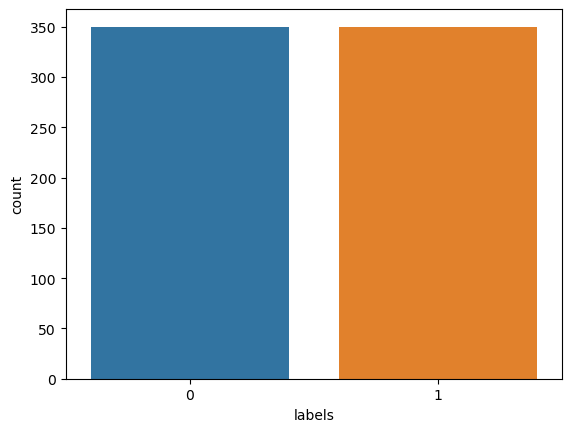

In [74]:
import seaborn as sns

sns.countplot(x=y_train_5050)


<AxesSubplot:xlabel='labels', ylabel='count'>

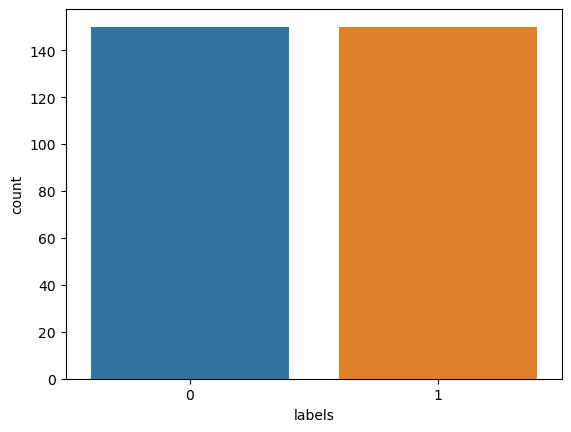

In [75]:
sns.countplot(x=y_test_5050)